<a href="https://colab.research.google.com/github/alecoder1/The-Premier-League-Players-Score-Predictions/blob/main/The_Premier_League_Players_Score_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Regression is one of the foundational techniques in Machine Learning. As one of the mist well understood algorithims, linear regression plays a vital role in solving real-life problems. In this roject we wish to use Linear Regression to predict the scores of EPL football players. With the business implications cleared.

### Install packages


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Reading from Different Sources

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import scipy
from matplotlib.pyplot import figure

In [4]:
# Load the data as a dataframe by using URL

data_url = "https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/EPL_Soccer_MLR_LR.csv"
df = pd.read_csv(data_url)

In [5]:
# View top 5 entries from the football data

df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [6]:
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

### Data Dictionary

- PlayerName: Player Name
- Club: Club of the player
- DistanceCovered(inKms): Average Kms distance covered by the player in each game
- MinutestoGoalRatio: Minutes
- ShotsPerGame: Average shots taken per game
- AgentCharges: Agent Fees in H
- BMI : Body Mass Index
- Cost: Cost of each player in hundred thousand dollars
- PreviousClubCost: Previous club cost in hundred thousand dollars
- Height: Height of player in cm
- Weight: Weight of player in KG
- Score:  Average score per match


### Exploratory Data Analysis

EDA is a technique to analyze the data with visuals.
- It involves using statistics and visual techniques to identify particular trendsin data.
- It is used to understand data patterns, spot anomalies, check assumptions, etc.
- The main purpose of EDA is to help look the data before making any hypothesis about it.

### DataFrame Information

- The dataframe.info() method prints information about the dataframe, including the index dtype and columns, non-null values and memmory usage.
- It can be used to get basic info, look for missing values, and get sense of each variable's format.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [8]:
# Descriptive statistics

df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


### Correlation

- Correlation coeeficient is used to measure the strength of relationship bwtween two variables.
- It indicates that as a values of one variable changes the other variable changes in a specific direction with some maginitude.
- There are various ways to find correlation between two variables, one of which is Pearson Correlation coefficient.
- It measures the linear relationship between two continuos variables.
- Their strength of relationship is measured by the absolute value of coefficient, whereas the sign of the coefficient indicates the direction of the relationship.
- r =1  indicates a perfect negative relationship between the variables
- r = 0 indicates no relationship between the variables
- r = 1  indicates a perfect positive relationship between the variables

- To find correlation between variables from the football data we will use pandas.dataframe.corr() method.
- It computes pairwise correlation between two columns by excluding NA or NaN values if any. The default method used to calculate correlation coefficient is pearson correlation.


In [9]:
df.select_dtypes(include=['number']).corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


- The correlation between DistanceCovered(in Kms) and the target variable score -0.49
- This indicates negative correlation.
The variable cost is related to the target variable with correlation coefficient 0.96 which indicates strong positive relationship.
- Correlation between two variables indicates association between two variables but it does not mean change in one variable is caused by another.

### Relationship between Cost and Score

- Score and cost have 96% correlation, making it a significant variable.
- Cost can be selected as the predictor variable for simple linear regression since the scatter plot between them will demonstrate a linear relationship.

- To see this relationship visually, let's plot the scatter pot for Cost and Score.

Text(0.5, 1.0, 'Scatter plot between the Cost and Score')

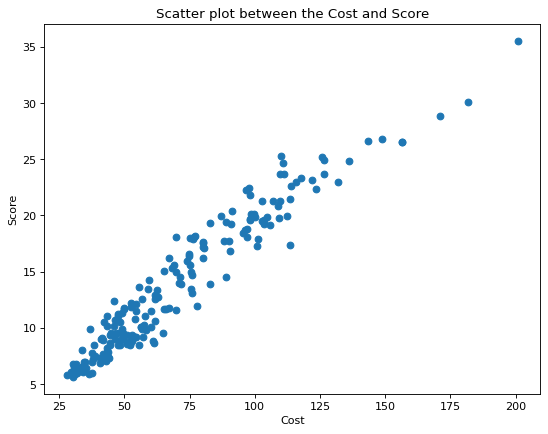

In [10]:
# Let's plot cost vs. score

figure(figsize=(8, 6), dpi=80)

plt.scatter(df['Cost'], df['Score'])

# label
plt.xlabel('Cost')
plt.ylabel('Score')
plt.title("Scatter plot between the Cost and Score")

# Strong linear association between the cost and score, maybe some concern with model after a cost of 125 or so!

- The correlation between Cost and Score is easily visible here.
-  The pearson correlation and scatter plot demonstrate that as Cost increases, so does the score.
- But what can we do with this knowledge?

- How can we know how much money should be spent to achieve a specific score?
This is where Linear Regression comes in.
- It assists us in modelling the linear relationship between two or more variables so that we may foresee the results using the model.
- Let's figure out how.

### Train - Test Split

- The data points are divided into two datasets, train and test, in a train test split method.
- The train data is used to train the model, and the model is then used to predict on the test data to see how the model performs on unseen data and whether it is overfitting or underfitting.

### Underfitting and Overfitting

- Underfitting - Happens when a model is too simple to capture data patterns, leading to poor performance on both training and test sets. It occurs due to overly simplistic models or insufficient data. Solutions include using a more complex model or adding features.

- Overfitting -  Occurs when a model learns noise instead of patterns, performing welll on training data but poorly on test data. It results from excessive complexity relative to the dataset. To prevent it, use regularization or more data.

In [11]:
# Assign x, y then do training testing split.

x=df['Cost']
y=df['Score']



# Splitting with 75% training, 25% testing daata

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    train_size = 0.75,
    test_size=0.25,
    random_state = 100)


- The data is first assigned to imput varible (x) and output variable (y) accordingly, then the train test split function from sklearn is used to perform splitting into a ratio of 75:25 with a random state of 100.
- The random state is a seed given to randomly generated indices for train and test sets.

### Linear Regression

- Linear Regression is a statistical approach to modelling the linear relationship between predictor variables and the target variable.
- These variables are known as the independent and dependent variables, respectively.
When there is one independent variable, it is known as simple linear regression.
- When there are more independent variables, it is called multiple linear regression.

- Simple Linear Regression:  y = β0 + β1x + ϵ

- Multiple Linear Regression:  y = β0 + β1x1 + …βpxp + ϵ where p
  is... number of features in the model

- Linear regression serves twon primary functions, understanding variable relationships and forcasting.
    - The coefficients represent the estimated maginitude and direction (positive/negative) of each independent variable's relationship with the independent variable.
    - A linear regression equation predicts the mean value of the independent variable given the values of the independent variables. So it enables us to forecast.

##### Example

- Assume your father owns an ice cream shop. Soetimes there is too muc ice cream in the store, and other times there isn't enough to sell. You notice that ise cream sales are mich higher on hot days than on cold days.
- There appears to be some correlation between the temperature and the sale of ice cream.
- There appears to be some correlation between the temperature and the sale of ice cream.

- Now you must determine the optimal number of ice creams to store in order to sell enough and have little left over at the end of the day.

- How can you forecast the sale for the next few days?
- Is there any ways to predict the sale of the next day given the temperature of the last few days?
- Yes you can use simple linear regression to model the temperature and sales.
- Now that we are clear on the why let's go ahead to the "how" part of linear regresion.

### Mathematics behind Linear Regression

- Here is the formula for simple linear regression

 y = β0 + β1x + ϵ


- Let's understand each of the terms involved:
    - For any fiven value of the independent variable (x), y is the predicted value for the independent variable (y).
    - β0 represents the intercept, or the predicted value of y when x is 0.
    - β1 is the regression coefficient, which tells us how much y will change as x increases.
    - x is the independent or predictor variable that helps us predict y.
    - ϵ is the error left due to not so accurate calculation of the regression coefficients.

- Linear regression determines the best fit line across your data by looking for the regression coefficient (B1) that minimizes the model's total error (e)





https://www.kaggle.com/code/abdoomoh/the-premier-league-players-score-predictions?cellIds=33&kernelSessionId=220755484

- Lets move to our case, we are gong to model the relationship between Cost and Scores using Ordinary Least Squares of the statsmodel library.

In [12]:
import statsmodels.api as sm

In [13]:
# statsmodels approach to regression
# fit the model

lr = sm.OLS(y_train, x_train).fit()

#  Printing the parameters

lr.params
lr.summary()


# force intercept term

x_train_with_intercept =  sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           6.91e-88
Time:                        09:46:16   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.0

### Model Summary

- Now that we have successfully modeled let's evaluate the results and summary of the model.
- R2 : The R2 or the coefficient of determination is the proportion of the variance in the dependent variable that is explained from the independent variable(s).
- R2 is expressed between 0 and 1 for the level of variance explained. As we learned in the previous section, the ratio SSE/TSS should be low for a robust model, this ratio signifies the error or unexplained variance by the independent variable(s).
- We got an R2 of 0.93 which is pretty good.

- F-Statistic: F-Statistic can be used for hypothesis testing about whether the slope is meaningful or not. F-statistics is a statistic used to test the significance of regression coefficients in linear regression models. F-statistics can be calculated as MSR/MSE where MSR represents the mean sum of squares regression and MSE represents the mean sum of squares error. The null hypothesis is that the slope is 0 or there is no relationship between the predictor and target variables. If the value of F-statistics is greater than the critical value, we can reject the null hypothesis and conclude that there’s a significant relationship between the predictor variables and the response variable.

- Prob (F-Statistic): The p-value of the f statistic is very small, which basically means what are the odds that the null hypothesis is true and we observe the same result due to random chance, and the odds are very small that h0: beta1 is 0, highly unlikely that the model is not good, and highly likely that the slope is not zero.

const    0.947185
Cost     0.182083
dtype: float64


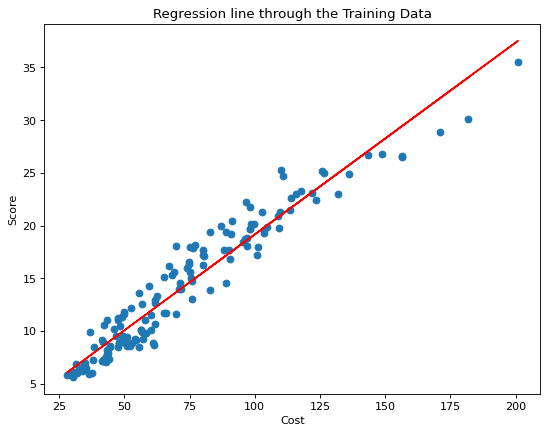

In [14]:
# Extract the B0, B1

print(lr.params)

b0=lr.params[0]
b1=lr.params[1]


# Plot the fitted line on training data

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)

plt.plot(x_train, b0 + b1*x_train, color='r')
plt.xlabel('Cost')
plt.ylabel('Score')
plt.title("Regression line through the Training Data")

plt.show()

- In this plot, we are extracting the values of the intercept β0 and coefficient/slope β1 and plotting the regression line over the scatter plot of the Cost and Score training data.
- The regression line has a good fitting, it probably deviates a liitle after a cost of 125 or so, let's see if we can improve it in the later sections when we diagnose and remedy but fisrt let's see how our model performs on the test data.


### Prediction on Test Data

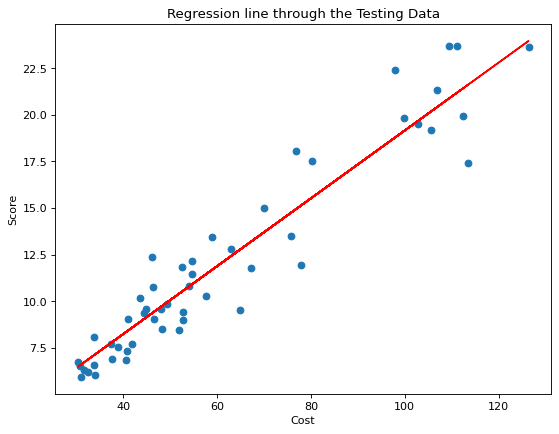

In [15]:
# Plot the fitted line on the test data


x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

# scatter lot on test data

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Testing Data")

plt.show()

- Here we can see the model has built a good regression fit as it is passing through the middle of all the points to get the minimum error.

- Observe that all the data points in the test data lie in the range of the training data.
This is called interpolation.
- What if we analyze a data point with a cost say 560? This is extrapolation and the model probably won't be robust to it.

### Assumptions of Linear Regression

- LR is a parametric model which means it requires the specification of some parameters before they can be used to make predictions. There parameters or assumptions are:
  - The relationship between the independent and dependent variable is linear; the line of the best fit through the data points ia a straight line.
  - Homoscedasticity means homogeinity of variance of residuals across the values of the independent variable.
  - Independence of observations: the observations in the dataset were collected using statiscally valid sampling methods, and there are no hidden relationships among observations.
  - Normality: The data follows a normal distribution.


### Diagnostics and Remedies

- As we learned in the previous section, Linear Regression follows some assumptions.
- The section Diagnostics and Remedies is evaluating if the data follows the assumptions or not, whether Linear Regression is a good fit for the patterns in the data, and simply includes the things we do in order to assess how well the model performs.
- The following are the things we look for in the data to diagnose Linear Regression as an unfit model.

    - Non-Linearity: First thing to look for is non-linearity, for example, your data might look linear for some time, and then it shows non-linearity and a parabola would fit better than a staight line.
    - Heteroscedasticity: meaning non-constant variance, variance in one region may not be the same as in the second region.
    - Independence: Erros are not independent and identically distributed.
    - Outliers:  Outliers can have large impact on the model, for example, if there' s a slow-growing regression line and there is an outlier up in the center, it will pull the regression line upwards than most of the data.
    - Missing Features:  Missing predictor variables, no need in a simple linear regression, which simply means losing on variables that can be useful but are not included.


- How do we begin to  assess all there things?

### Residual Analysis

- Residual analysis is used to study reiduals in data and to understand what needs to be done to improce our model performance.
- Residual is the error we get by substracting the prediction values from the true values of the dependent variable.

            Ri = yi - yi


  - First, plot the residual versus predictor, if the scatter plot show a departure from linearity (parabola), reevaluate the model, if not, try to make the model linear.
  - This plot also shows indications of non-constant variance, if the data points scatter in the shape of a megaphone, we can use weighted least squares.
  - Another plot that an be used is a sequence plot or residuals versus time order.We may want to search for a cyclical pattern or a straight trend, which indicates when linear regression would be useful and when it would not.
  - Box plot of residuals: if we have a lovely and centered box plot, we are fine. If we have a ittle bias to one side of the box plot, we clearly lack some normalcy; we can also check this normal probability plot if it is skewed to the right and skewed to the left.
  - Next is to check for outliers, dont eliminate outliers unless you absolutely have to such as  in a scenario when a data point is simply incorrect.


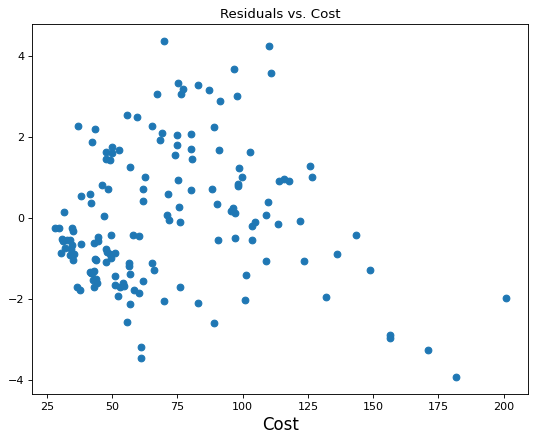

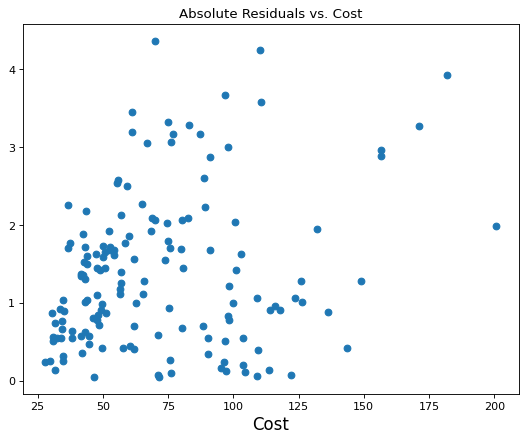

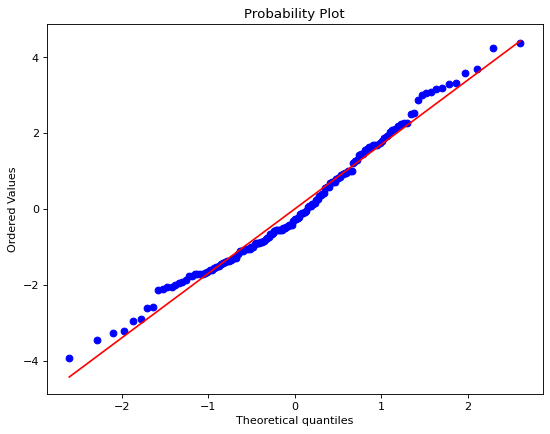

<Figure size 640x480 with 0 Axes>

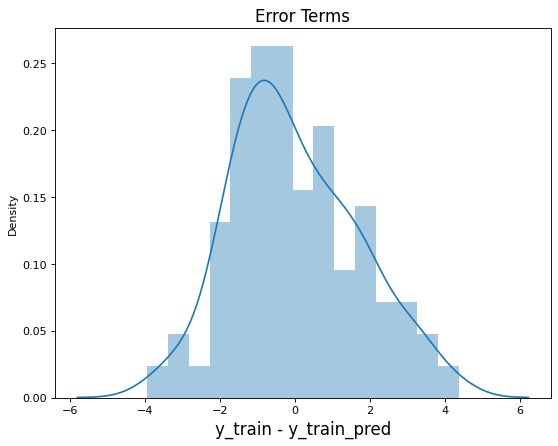

Text(0.5, 1.0, 'Residual Boxplot')

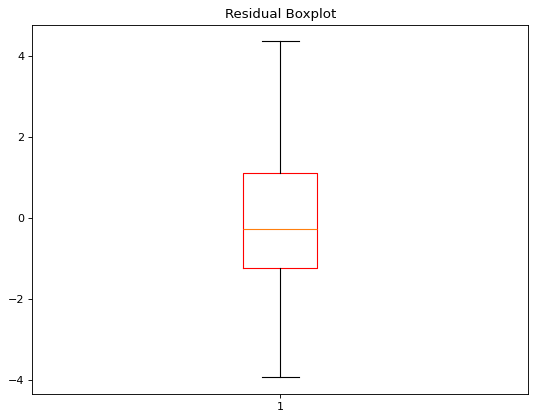

In [16]:
# DIAGNOSTICS

# CHECKLIST:

# 1 - NON-LINEARITY
# 2 - NON-CONSTANT VARIANCE
# 3 - DEVIATIONS FROM NORMALITY
# 4 - ERRORS NOT IID
# 5 - OUTLIERS
# 6  MISSING PREDICTORS


# Building predictions on training data

predictions_y = lr.predict(x_train_with_intercept)


# Find residuals
r_i = (y_train - predictions_y)


# Residuals vs. predictor in training data

figure(figsize=(8, 6), dpi=80)
plt.title('Residuals vs. Cost')
plt.xlabel('Cost', fontsize=15)
plt.scatter(x_train, r_i)
plt.show()

# Absolute residuals against predictor

abs_r_i = np.abs(y_train - predictions_y)
figure(figsize=(8, 6), dpi=80)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost', fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()



# Normality plot

figure(figsize=(8, 6), dpi=80)
scipy.stats.probplot(r_i, plot=plt)



# Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histograms of residuals
# Plotting the histogram using the residual values


fg = plt.figure()
figure(figsize=(8, 6), dpi=80)
sns.distplot(r_i, bins=15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()


# Boxplot for outliers
# plot

figure(figsize=(8, 6), dpi=80)
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot')

- Here are the observations that we made from the above plots:
    - The residual vs cost shows a good scatter of residuals and no pattern is observed up until 125 or 150 costs.
    - We can say we have some heteroscedasticity in the higher costs. We'll see how we can tackle it.
    - The normality of the errors can be seen in the normal probability plot and the historgram. It is more or less normall or bell shaped.
    - The residual boxplot shows no obvious outliers.


### Transformations to avoid non_constant variance

- Non-constant variance can be a roblem in linear regression, as the assumption of constant variance of the errors is a key requirement for the ordinary least squares (OLS) METHOD TO BE UNBIASED AND EFFICIENT.
- When this assumption is violated, the regression coefficients can be inefficient and/or the predictions can be biased.
- To avoid non-constant variance, there are different data transformation that can be applied.
  - Log transformation: This transformation is often used when the variance of the data increases with the mean. A log transformation can be used to stabilize the variance by converting the data into square root values.
  - Square root trnsformation: This transformation is also used to stabilize the variance by converting the data into square root values.
  - Box-Cox transformation: This is a statistical transformation that is used to stabilize the variance by transforming the data into values that are closer to a normal distribution. The Box-Cox transformation is a more flexible and powerful transformation compared to the log and square root transformations.

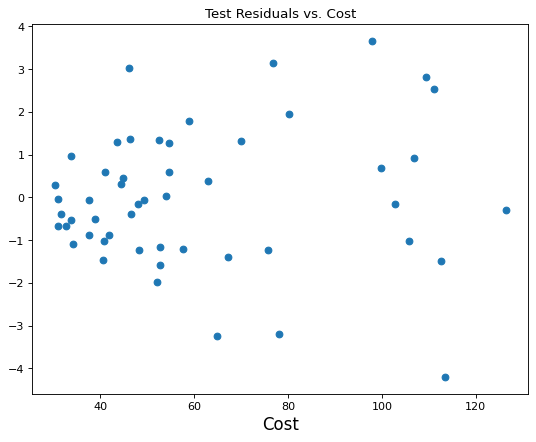

In [17]:
# Demo of how to deal with non_constant variance through transformations

test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)


# Residuals vs. predictor in a test set
figure(figsize=(8, 6), dpi=80)
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost', fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()


# Some evidence of non-constant variance

- We can see the scatter of data points increases as we increase the cost.
- This is evident of Heteroscedasticity.
- We will try different transformations such as square root, log, and box-cox to see if we can introduce linearity with these transformations.

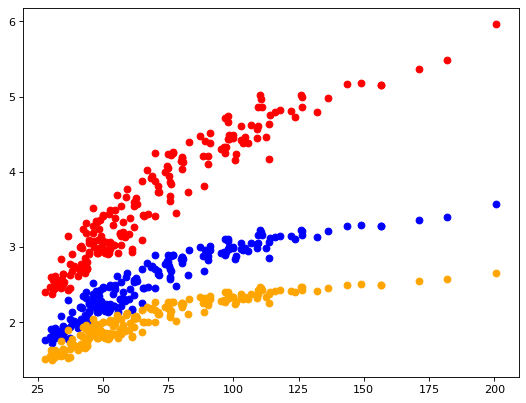

In [18]:
# Try sqrt

sqrt_y = np.sqrt(y)
figure(figsize=(8, 6), dpi=80)
plt.scatter(x, sqrt_y, color='red')


# Try ln

ln_y = np.log(y)
plt.scatter(x, ln_y, color='blue')


# Let's try a BC transformation


# Box-Cox procedure on all cost
bc_y = list(stats.boxcox(y))
bc_y = bc_y[0]
plt.scatter(x, bc_y, color='orange')


# Overall, most satisfied with the sqrt transformation


- We can observe that the square root transformation denoted by red dots gives the most linear scatter of data points.
- Let's try to run the linear regression model on the transformed variable and analyze the change in results.

In [19]:
# Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size=.75, test_size=0.25, random_state=100)


# force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           9.72e-75
Time:                        09:46:21   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.0

- We can see the change in R^2 and R^2 after the transformation.
- They are almost similar wich suggests that R^2 is no longer overestimating the variance exlained by the predictor variable.

const    1.967367
Cost     0.023433
dtype: float64


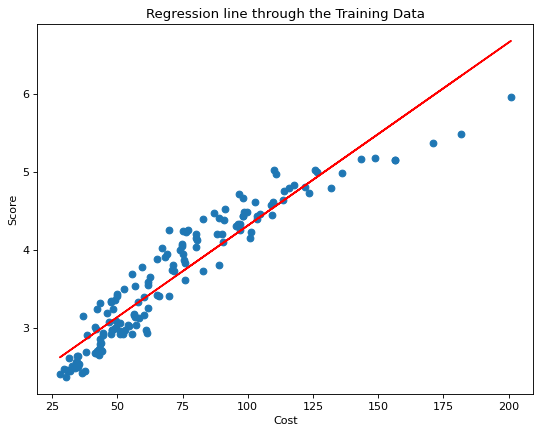

In [21]:
# Extract the B0, B1

print(lr.params)
b0 = lr.params[0]
b1 = lr.params[1]


# Plot the fitted line on training data

figure(figsize=(8, 6), dpi=80)
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training Data")
plt.show()

- We extracted the linear regression coefficients and plotted the regression  line on the Cost vs Score scatter plot

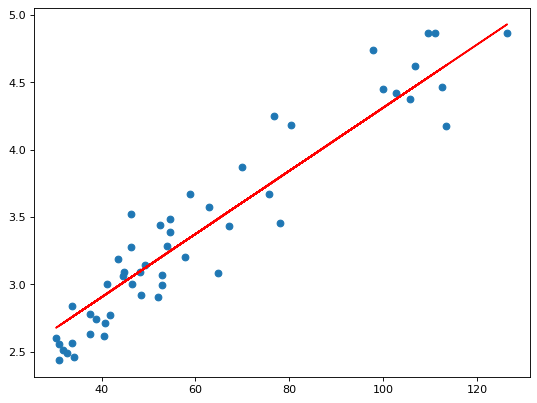

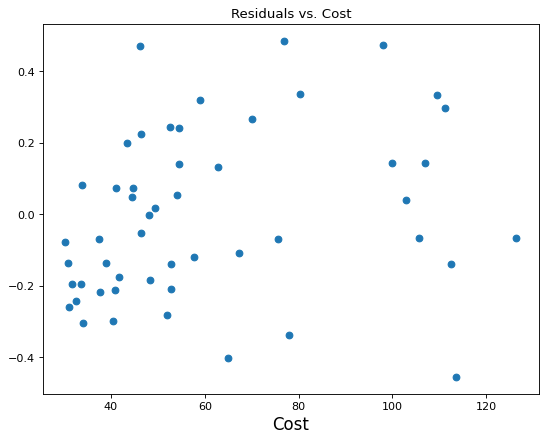

In [23]:
# Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

figure(figsize=(8, 6), dpi=80)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')

plt.show()



# Evaluate the variance
# Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)


# Residuals vs. predictor
figure(figsize=(8, 6), dpi=80)
plt.title('Residuals vs. Cost')
plt.xlabel('Cost', fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

# Non-constant variance reduced, but we also reduced our coefficient of determincation

- Here is the same exercise but for the test dataset. Observe that the range of test data is within the train data and the maximum cost is 120, hence the regression line fits in the best way possible.

#### Conclusion
- This project is coming to a close, but let's go through what we learned and what we can do next.
- With a simple Linear Regression problem statement, we learned the fundamentas of Linear Regression by predicting the scores of Football players based on their cost.
- We grasped the assumptions for Linear Regression and how to diagnose and correct data errors related to the assumptions.






### Linear Regression in Real LIFE

- There are many real-world applications of linear regression. Exploring some of the best Linear Regression real world applications will hlp us comprehend more clearly.
    - Humans are not an exception; everything has a shelf life.
    - We can store vast amounts of information about a person's medical history and estimate how long they will live thanks to ongoing improvements in medical science technology and diagnostic tools.
    - The term life expectancy describes the numbeer of years ine can expect to live.
    - This application is frequently used by insurance companies and public healthcare organizations to increase their productivity and achieve organizational goals.

    - A common method used by agricultural scientists to assess how fertilizer and water affect crop yields is linear regression.
    - For instance, researchers may vary the water and fertilizer applications in various fields to observe the effects on croop yield.
    - A multiple linear regression model can be used with crop yield as the target variable and fertilizer and water as the predictor variables.


    - For professional sports team, analyst use linear regression to gauge the impact of various training schedules on player  performance.
    - For instance, data scientists in the NBA may examine how various frequencies of yoga and weightlifting sessions each week affect a player's point total.
    - With yoga and wightlifting sessions as the predictor variables and total points eaned as the responze cariable, they could fit a multiple linear regression model.
    - Here's another project that solves the same business problem.

### Interview Questions
- What do you understand by correlation?
- Does correlation imply causation? Can you explain it with some examples?
- Can you explain what is Linear Regression?
- What are the assumptions of Linear Regression?
- What is R2 and Adjusted R2?
- What are RMSE and MSE?
- What is the efect of heteroscedasticity on Regression Models? Is there any solution to it

